# Introduction


**Name : Dinda Tirta Rahayu**

**FTDS - Batch 004**

# The Problem

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. **Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.**

So, here we are trying to build cluster model to choose the countries that need of aid. 

# Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Loading

In [4]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
print(data.shape)
print(data.info())

(167, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


# Documentation

In [7]:
# Documentation 
doc = pd.read_csv('data-dictionary.csv')
doc

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services. Given as %age o...
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age o...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


# Data Cleaning

In [8]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There's no any missing values.

In [10]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [11]:
X = data.copy()
X = X.drop(['country'], axis=1)

In [12]:
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


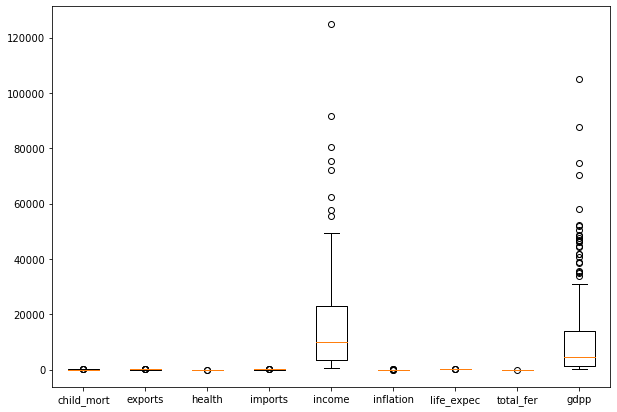

In [27]:
cols = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']

plt.figure(figsize=(10,7))
plt.boxplot(data[cols], labels=cols)
plt.show()

From the graphs above, we know that feature income and gdp have so many data anomaly. Since we all infomation of dataset are important, we could'nt treat it to remove. 

# Data Exploration

In [15]:
X.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Summary

Dari tabel describe() kita bisa melihat beberapa insights yaitu :
    
1. Feature Child mort, Exports, income, dan gdp diduga mengalami rigth skewed. Karena memiliki nilai mean > median.

2. Hampir semua feature memiliki selisih angka min dan max yang jauh, diduga terdapat beberapa outliers disini.

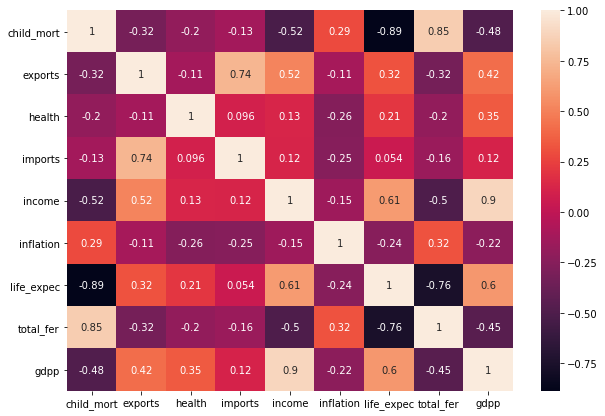

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(X.corr(method='pearson'), annot=True)
plt.show()

Dari tabel korelasi diatas, dapat kita lihat bahwa ada beberapa feature memiliki nilai korelasi diatas 0.50 yang berarti saling berkorelasi. Hal ini bisa dikatakan bahwa feature memiliki variansi multicollinearity. Tetapi akan lebih jelasnya jika kita menggunakan VIF dibawah ini.

In [14]:
#VIF
num_features = X.select_dtypes('number')
vif_data = pd.DataFrame()
vif_data['feature'] = num_features.columns
vif_data['VIF'] = [variance_inflation_factor(num_features.values, i) for i in range(len(num_features.columns))]
vif_data

,feature,VIF
0,child_mort,8.084814
1,exports,16.084236
2,health,12.421525
3,imports,17.280234
4,income,13.414051
5,inflation,1.985961
6,life_expec,21.916807
7,total_fer,17.673828
8,gdpp,10.298641


Berdasarkan tabel VIF diatas, hampir semua feature memiliki angka VIF yang melebihi treshold 5. Hal ini cukup jelas untuk menggambarkan bahwa feature mengalami kemiripan atau multicollinearity. **Sehingga untuk kasus ini, kita dapat treat featurenya dengan menggunakan PCA.**

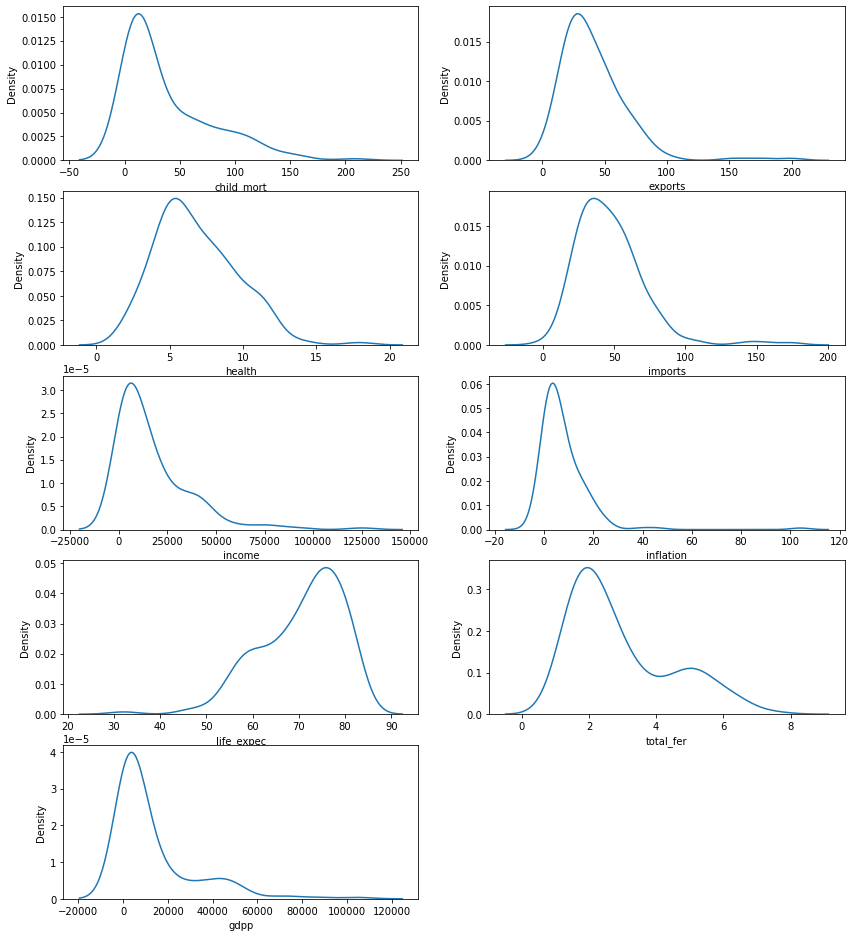

In [17]:
#figure it out
plt.figure(figsize=(14,30))
for i, col in enumerate(X):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(X[col], ax=ax)
plt.show()

**Exploration**

**Negara dengan GDP tertinggi**

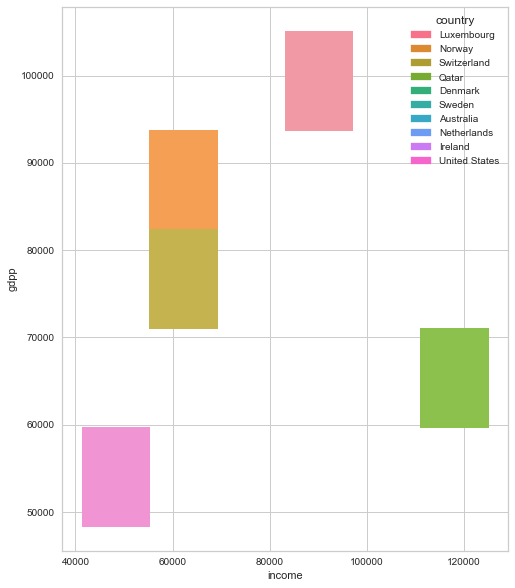

In [88]:
viss1 = data.groupby('country')[['income', 'gdpp']].sum().reset_index().sort_values(by='gdpp', ascending=False)[:10]

plt.figure(figsize=(8, 10))
sns.histplot(y=viss1['gdpp'], x=viss1['income'], hue=viss1['country'])
plt.show()

In [89]:
viss1

,country,income,gdpp
91,Luxembourg,91700,105000
114,Norway,62300,87800
145,Switzerland,55500,74600
123,Qatar,125000,70300
44,Denmark,44000,58000
144,Sweden,42900,52100
7,Australia,41400,51900
110,Netherlands,45500,50300
73,Ireland,45700,48700
159,United States,49400,48400


GDP (Gross Domestic Product) yaitu pendapatan per kapita yang menjadi tolak ukur pendapatan suatu negara (pendapatan aggregat) yang di hitung dari berbagai sektor. 

Dari tabel diatas menunjukkan bahwa dinatara 167 negara, terdapat 10 negara yang memiliki GDP paling tinggi yaitu Luxembourg, Norway, Switzerland, Qatar, Denmark, Sweden, Australia, Netherlands, Ireland dan US. Kemungkinan negara ini tidak termasuk ke dalam kategori **Undeveloped Countries**. Karena GDP tinggi yang berari pertumbuhan ekonominya tinggi.

**Negara dengan income tertinggi**

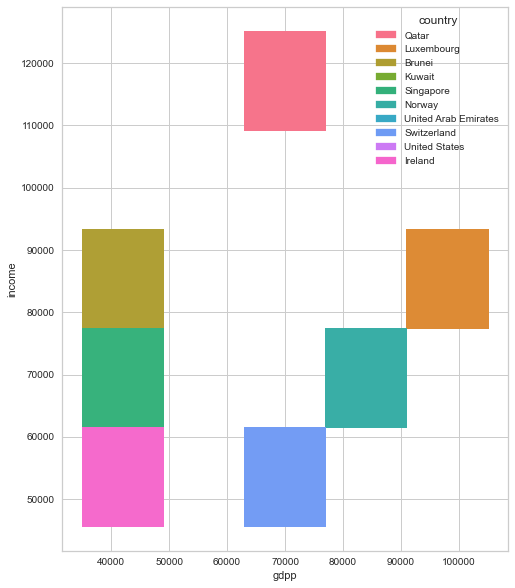

In [102]:
viss2 = data.groupby('country')[['income', 'gdpp']].sum().reset_index().sort_values(by='income', ascending=False)[:10]

#plot 
plt.figure(figsize=(8, 10))
sns.histplot(y=viss2['income'], x=viss2['gdpp'], hue=viss2['country'], element="step")
plt.show()

In [87]:
viss2

,country,income,gdpp
123,Qatar,125000,70300
91,Luxembourg,91700,105000
23,Brunei,80600,35300
82,Kuwait,75200,38500
133,Singapore,72100,46600
114,Norway,62300,87800
157,United Arab Emirates,57600,35000
145,Switzerland,55500,74600
159,United States,49400,48400
73,Ireland,45700,48700


Namun sebaliknya jika kita mengurutkan berdasarkan negara yang memiliki income paling tinggi yaitu Qatar, Luxembourg, Brunei, Kuwait, Singapore, Norway, UEA, Switzerland, US, dan Ireland. 

Income hanya menunjukkan net pendapatan per orang, bisa dikatakan negara-negara tersebut kecuali Qatar, Luxembourg, US dan Ireland memiliki pendapatan yang tidak merata. Bisa jadi GDP ini didominasi dengan masyarakat yang memiliki income tinggi. Sehingga kemungkinan negara-negara kecuali 4 negara tadi masih bisa masuk ke dalam **kategori Undeveloped Countries.**

**Negara dengan angka kematian anak dibawah 5 tahun tertinggi**

In [94]:
viss3 = data.groupby('country')[['life_expec', 'child_mort']].sum().reset_index().sort_values(by='child_mort', ascending=False)[:10]

In [95]:
viss3

,country,life_expec,child_mort
66,Haiti,32.1,208.0
132,Sierra Leone,55.0,160.0
32,Chad,56.5,150.0
31,Central African Republic,47.5,149.0
97,Mali,59.5,137.0
113,Nigeria,60.5,130.0
112,Niger,58.8,123.0
3,Angola,60.1,119.0
25,Burkina Faso,57.9,116.0
37,"Congo, Dem. Rep.",57.5,116.0


Text(0.5, 1.0, 'Distribution the most highest child mort countries')

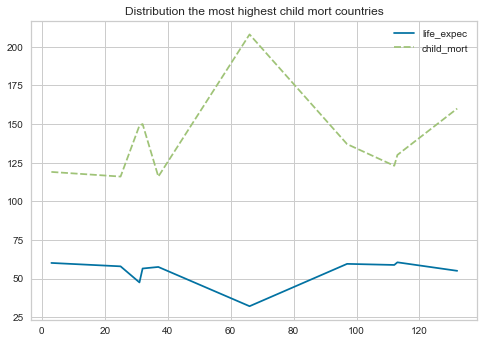

In [108]:
sns.lineplot(data=viss3)
plt.title('Distribution the most highest child mort countries')

In [109]:
viss

66                        Haiti
132                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
113                     Nigeria
112                       Niger
3                        Angola
25                 Burkina Faso
37             Congo, Dem. Rep.
Name: country, dtype: object

Dari grafik diatas, kita dapat menyimpulkan bahwa life expect dan child mort berbanding terbalik, ketika angka ekspektasi hidup seorang bayi tinggi maka angka kematian anak dibawah 5 tahun pun rendah. 

Negara yang memiliki angka kematian anak dibawah usia 5 tahun tertinggi yaitu Haiti, Sierra Leone, Central African Republic, Mali, dst. Angka kematian anak ini bisa karena penyakit dan keadaan ekonomi yang kurang yang bisa jadi angka kemiskinan di neagar tsb tinggi. Mari kita coba bandingkan dengan angka gdp terendah.

**Negara dengan GDP terendah**
(mendeteksi kemiskinan)

In [111]:
data.groupby('country')[['gdpp']].sum().reset_index().sort_values(by='gdpp', ascending=True)[:10]

,country,gdpp
26,Burundi,231
88,Liberia,327
37,"Congo, Dem. Rep.",334
112,Niger,348
132,Sierra Leone,399
93,Madagascar,413
106,Mozambique,419
31,Central African Republic,446
94,Malawi,459
50,Eritrea,482


Ternyata negara Sierra Leone, Central African Republicm dan Nigeria termasuk ke dalam 10 besar negara yang GDP nya terendah. Maka kemungkinan negara ini termasuk ke dalam undepeloped countries.

# Data Preprocessing

In [18]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [19]:
cols = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']

#Scaling
scaler = StandardScaler()
X = X[cols]
X[cols] = scaler.fit_transform(X)

**PCA**

In [21]:
X_pca=PCA(n_components=0.95).fit(X)
new_df = X_pca.transform(X)
X_pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235])

Disini kita menggunakan PCA dengan mencari nilai Explained Variance Ratio (EVR) sebesar 95%, artinya kita memiliki informasi dari data original sebanyak 95% sehingga kita tidak banyak kehilangan informasi. 

Let's see how much components to get this EVR. 

In [22]:
X_pca.n_components_

6

Actually we need 6 components to get 95% EVR. Let's visualize it!

**Find the best n_components**

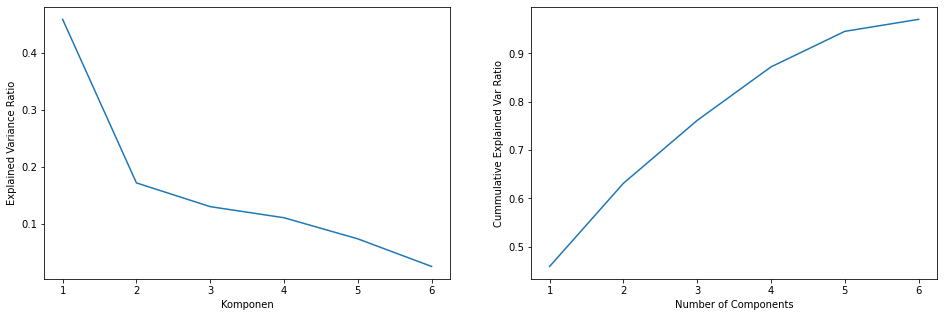

In [23]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,7),X_pca.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,7),np.cumsum(X_pca.explained_variance_ratio_))
ax[1].set_xlabel('Number of Components')
ax[1].set_ylabel('Cummulative Explained Var Ratio')
plt.show()

# Model Definition

We will use K-Means algorthm to cluster this data. Since K-Means is pretty simple to cluster.

**Find the best n_clusters using The Elbox Method**

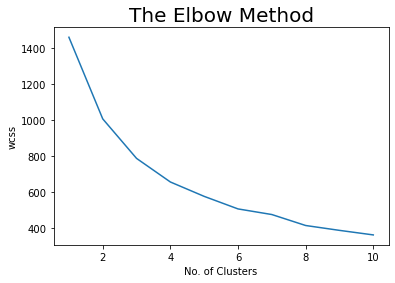

In [28]:
from sklearn.cluster import KMeans

wcss = []
#membuat iterasi dari 1-10 untuk nilai k terbaik
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(new_df)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

As we can see, the elbow happened in 4 no. of clusters. So, the best clusters is 4. Let's build the model.

**Build the model using K-Means**

In [147]:
kmeans = KMeans(n_clusters=4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(new_df)
y_pred = kmeans.predict(new_df)
centers = kmeans.cluster_centers_

In [148]:
centers

array([[ 0.22258199, -0.10419668,  0.01191178, -0.73067402,  0.15220918,
         0.04801699],
       [ 5.46022462,  5.43247334,  0.21164795,  0.90605761,  0.45522896,
        -0.15873469],
       [-2.46837066,  0.41027365, -0.08554783,  0.69791763, -0.15119825,
        -0.06636082],
       [ 2.58590537, -0.86669   ,  0.07506731,  0.98256433, -0.26016584,
        -0.0232231 ]])

# Model Evaluation 

**Evaluate using Silhoueete Score**

for n_clusters =4

In [41]:
range_n_clusters = list (range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=4).fit(new_df)
    preds = clusterer.predict(new_df)
    centers = clusterer.cluster_centers_

    score = silhouette_score(new_df, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3107306209462537)
For n_clusters = 3, silhouette score is 0.3107306209462537)
For n_clusters = 4, silhouette score is 0.31536252220069494)
For n_clusters = 5, silhouette score is 0.31536252220069494)
For n_clusters = 6, silhouette score is 0.31536252220069494)
For n_clusters = 7, silhouette score is 0.31616004789187996)
For n_clusters = 8, silhouette score is 0.31616004789187996)
For n_clusters = 9, silhouette score is 0.31616004789187996)


for n_clusters =6

In [42]:
range_n_clusters = list (range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=6).fit(new_df)
    preds = clusterer.predict(new_df)
    centers = clusterer.cluster_centers_

    score = silhouette_score(new_df, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.24086718079769587)
For n_clusters = 3, silhouette score is 0.24872909684589414)
For n_clusters = 4, silhouette score is 0.24975129669990226)
For n_clusters = 5, silhouette score is 0.24662667551236206)
For n_clusters = 6, silhouette score is 0.24527286457392564)
For n_clusters = 7, silhouette score is 0.24872909684589414)
For n_clusters = 8, silhouette score is 0.24527286457392564)
For n_clusters = 9, silhouette score is 0.24659115699100828)


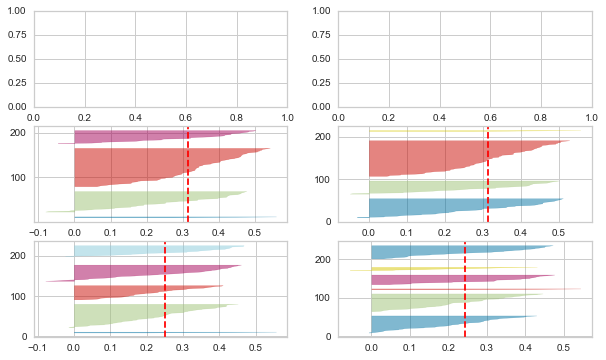

In [43]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize = (10,6))
for i in np.arange(4,8):
  km = KMeans(n_clusters = i, init="k-means++", n_init = 10, max_iter = 100, random_state = 42)
  # divmod(x, y) returns (x/y, x%y)
  q, mod = divmod(i,2)
  # print(q, mod)

  visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q-1][mod])
  visualizer.fit(new_df)

# Model Inference

In [174]:
new_data = [[65.6,2.20, 10.12,28.8,1000,26.500],
            [97.4,50.70,4.40,61.2,3450,18.980]]

y_pred_new_data = kmeans.predict(new_data)
y_pred_new_data

array([1, 1])

# Cluster Analysis

In [127]:
data['cluster'] = y_pred

In [138]:
clust2 = data[data.cluster == 2]
clust2.sort_values(by='life_expec', ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
149,Timor-Leste,62.6,2.20,9.12,27.8,1850,26.500,71.1,6.23,3600,2
99,Mauritania,97.4,50.70,4.41,61.2,3320,18.900,68.2,4.98,1200,2
165,Yemen,56.3,30.00,5.18,34.4,4480,23.600,67.5,4.67,1310,2
72,Iraq,36.9,39.40,8.41,34.1,12700,16.600,67.2,4.56,4500,2
142,Sudan,76.7,19.70,6.32,17.2,3370,19.600,66.3,4.88,1480,2
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2
56,Gambia,80.3,23.80,5.69,42.7,1660,4.300,65.5,5.71,562,2
116,Pakistan,92.1,13.50,2.20,19.4,4280,10.900,65.3,3.85,1040,2
126,Rwanda,63.6,12.00,10.50,30.0,1350,2.610,64.6,4.51,563,2
129,Senegal,66.8,24.90,5.66,40.3,2180,1.850,64.0,5.06,1000,2


In [139]:
clust1 = data[data.cluster == 1]
clust1.sort_values(by='gdpp', ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,1


In [150]:
clust0 = data[data.cluster == 0]
clust0.sort_values(by='child_mort', ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.040,66.8,2.41,988,0
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.310,67.9,2.83,4440,0
69,India,58.8,22.600,4.05,27.1000,4410,8.980,66.2,2.60,1350,0
21,Botswana,52.5,43.600,8.30,51.3000,13300,8.920,57.1,2.88,6350,0
146,Tajikistan,52.4,14.900,5.98,58.6000,2110,12.500,69.6,3.51,738,0
...,...,...,...,...,...,...,...,...,...,...,...
67,Hungary,6.0,81.800,7.33,76.5000,22300,2.330,74.5,1.25,13100,0
14,Belarus,5.5,51.400,5.61,64.5000,16200,15.100,70.4,1.49,6030,0
41,Croatia,5.5,37.600,7.76,38.1000,20100,0.821,76.3,1.55,13500,0
51,Estonia,4.5,75.100,6.03,68.7000,22700,1.740,76.0,1.72,14600,0


In [151]:
clust3 = data[data.cluster == 3]
clust3.sort_values(by='child_mort', ascending=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,3
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,3
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,3
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000,3
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400,3
111,New Zealand,6.2,30.3,10.10,28.0,32300,3.730,80.9,2.17,33700,3
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,3
158,United Kingdom,5.2,28.2,9.64,30.8,36200,1.570,80.3,1.92,38900,3
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3
74,Israel,4.6,35.0,7.63,32.9,29600,1.770,81.4,3.03,30600,3


# Clusters Visualization

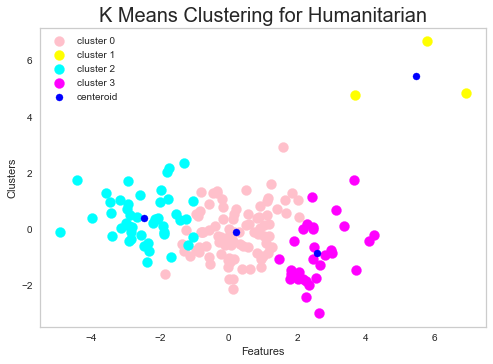

In [149]:
# lets visualize these clusters

#x[y_means == 0, 0] untuk x yg 0 untuk spending score, x[y_means == 0, 1] untuk x yg 1 annual score
plt.scatter(new_df[y_pred == 0, 0], new_df[y_pred == 0, 1], s = 100, c = 'pink', label = 'cluster 0')
plt.scatter(new_df[y_pred == 1, 0], new_df[y_pred == 1, 1], s = 100, c = 'yellow', label = 'cluster 1')
plt.scatter(new_df[y_pred == 2, 0], new_df[y_pred == 2, 1], s = 100, c = 'cyan', label = 'cluster 2')
plt.scatter(new_df[y_pred == 3, 0], new_df[y_pred == 3, 1], s = 100, c = 'magenta', label = 'cluster 3')
plt.scatter(centers[:,0], centers[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering for Humanitarian', fontsize = 20)
plt.xlabel('Features')

plt.ylabel('Clusters')
plt.legend()
plt.grid()
plt.show()

# Comparation to EDA analysis

**Cluster 2 dengan GDP terendah**

In [161]:
d = clust2.groupby('country')[['income', 'gdpp']].sum().reset_index().sort_values(by='gdpp', ascending=True)[:10]
d

,country,income,gdpp
4,Burundi,764,231
25,Liberia,700,327
9,"Congo, Dem. Rep.",609,334
32,Niger,814,348
37,Sierra Leone,1220,399
26,Madagascar,1390,413
30,Mozambique,918,419
6,Central African Republic,888,446
27,Malawi,1030,459
13,Eritrea,1420,482


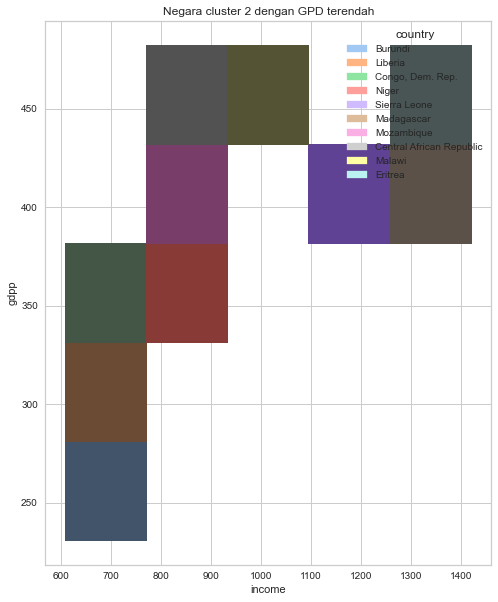

In [164]:
plt.figure(figsize=(8, 10))
sns.histplot(y=d['gdpp'], x=d['income'], hue=d['country'], palette='pastel')
plt.title('Negara cluster 2 dengan GPD terendah')
plt.show()

Kita telah menganalsis pada EDA bahwa Sierra Leone, Niger dan Central African Republic akan masuk ke dalam kategori **undeveloped countries**, dan yaa pada cluster 2 ini merupakan cluster yang kita sarankan kepada CEO dari NGO untuk pendanaan bantuan karena termasuk ke dalam undeveloped countires.

In [166]:
d1 = clust0.groupby('country')[['income', 'gdpp']].sum().reset_index().sort_values(by='gdpp', ascending=True)[:10]
d1

,country,income,gdpp
58,Nepal,1990,592
76,Tajikistan,2110,738
8,Bangladesh,2440,758
18,Cambodia,2520,786
43,Kyrgyz Republic,2790,880
57,Myanmar,3720,988
72,Solomon Islands,1780,1290
87,Vietnam,4490,1310
37,India,4410,1350
84,Uzbekistan,4240,1380


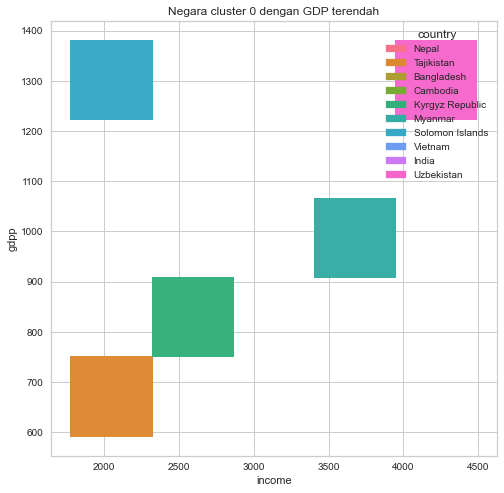

In [171]:
plt.figure(figsize=(8, 8))
sns.histplot(y=d1['gdpp'], x=d1['income'], hue=d1['country'])
plt.title('Negara cluster 0 dengan GDP terendah')
plt.show()

# Overall analysis

1. Jumlah cluster yang didapatkan yaitu 4 cluster. 

2. Disini kita akan melihat dengan 3 karakteristik yang dianggap importan yaitu GPD, income dan life expect. 

- **Karakteristik cluster 2** yaitu memiliki range GDP dari 764-33700. Income dari range 334-17100. Child_mort dari range 36.9- 208.0. Life expect dari range 32.1-71.1, dan terdapat 46 negara yang masuk ke dalam cluster ini. 
- Sedangkan **cluster 1** yaitu memiliki karakteristik GDP tinggi dari range 21100-105000. Child_mort dengan range 2.8-3.6. Life expect dari range 80.3-82.7, dan terdapat 3 negara dalam cluster ini.
- **Kemudian cluster 0** memiliki karakteristik gpd sebesar range 592-28000. Income dengan range 1780-45400. Life expect dari range 57.1-80.4, child mort dari range 3.6-64.4 dan terdapat 88 negara dalam cluster ini.
- Terakhir **cluster 3** memiliki karakteristik yaitu gdp dengan range 22100-87800. Income dengan range 27200-125000. Life expect dengan range 1.87-82.8. Child mort dengan range 2.6-10.8.

3. Berdasarkan karakteristik diatas, kita dapat menyarankan kepada CEO dari NGO untuk menyalurkan dana bantuannya kepada negara-negara yang berada di cluster 2 dan cluster 0. Karena di negara-negara tersebut range GPD nya masih kecil, ketimpangan income per orang sangat terlihat dan juga angka rata-rata child mort yang tinggi dan angka rata-rata life expect yang rendah. Hal ini dapat diduga negara-negara pada cluster 2 dan cluster 0 mengalami angka kemiskinan yang cukup tinggi, sehingga bisa jadi menyebabkan kekurangan gizi pada anak yang menyebabkan kematian/penyakit. **Sehingga cluster0 dan cluster 2 dapat di kelompokkan kedalam cluster Undeveloped Countries**. Dengan proritas negara pada cluster 2.


4. Kita telah menganalsis pada EDA bahwa Sierra Leone, Niger dan Central African Republic akan masuk ke dalam kategori undeveloped countries, dan yaa pada cluster 2 ini merupakan cluster yang kita sarankan kepada CEO dari NGO untuk pendanaan bantuan karena termasuk ke dalam undeveloped countires.
